In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Convert field names to dict for easy access.
# Can be hard coded 
# 
fields_path = '../../input/training_validation_2/fields.csv'  
fields_df = pd.read_csv(fields_path)
fields_df.columns = ['name', 'f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6']

fields_dict = {}
fields_dictv2 = {}

for idx in range(fields_df.shape[0]):
    name = fields_df.loc[idx, 'name']

    _fields = []
    
    for f in fields_df.columns[1:]:
        if not (str(fields_df.loc[idx, f]) == 'nan'):
            _fields.append(name + "_" + str(fields_df.loc[idx, f]))
    
    fields_dict[idx] = {'name': fields_df.loc[idx, 'name'] , 'fields': _fields}
    fields_dictv2[name] = _fields
    
# fields_dict

In [3]:
feature_list = [fields_dict[2]['name']]
feature_list_regex= "|".join(["^"+f+"_" for f in feature_list])

feature_list

['DurationRobotFromFeederToTestBench']

In [4]:
# import data
data_df_1 = pd.read_csv("../../data/training_validation_1.csv")
data_df_2 = pd.read_csv("../../data/training_validation_2.csv")
merged_df = pd.concat([data_df_1, data_df_2], axis=0) # Merge data frames


In [5]:
train_df = merged_df.filter(regex=feature_list_regex)
# train_df = train_df.filter(regex="vCnt|value")
# train_df = data_df_2.filter(regex="^Temperature")

In [6]:
train_df.head()

,DurationRobotFromFeederToTestBench_vCnt,DurationRobotFromFeederToTestBench_vFreq,DurationRobotFromFeederToTestBench_vMax,DurationRobotFromFeederToTestBench_vMin,DurationRobotFromFeederToTestBench_vStd,DurationRobotFromFeederToTestBench_vTrend,DurationRobotFromFeederToTestBench_value
0,0,0.000000,NaN,NaN,NaN,NaN,NaN
1,3,0.297310,0.676,0.639,0.015755,-0.0045,0.654333
2,3,0.296778,0.707,0.637,0.028674,0.0150,0.673667
3,3,0.298541,0.679,0.637,0.019131,0.0015,0.652000
4,3,0.298554,0.711,0.663,0.019872,-0.0085,0.689333


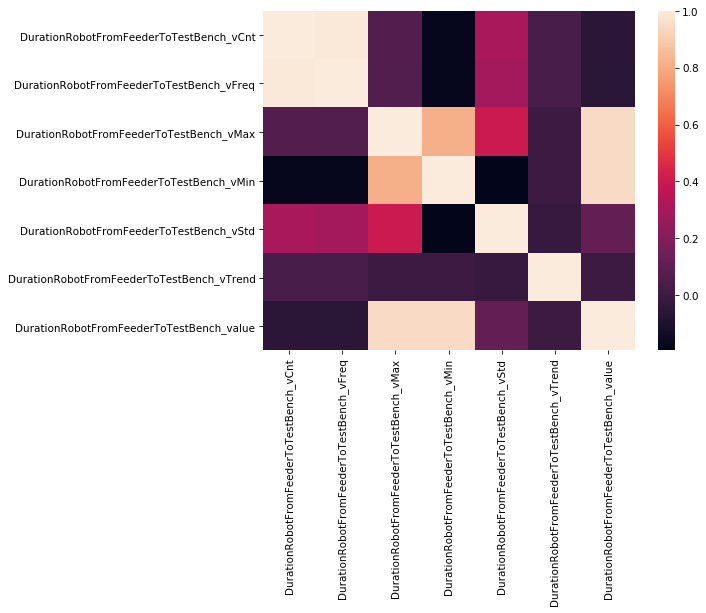

In [7]:
fig = plt.figure(figsize=(8,6), dpi=75)
sns.heatmap(train_df.corr(),annot=False)

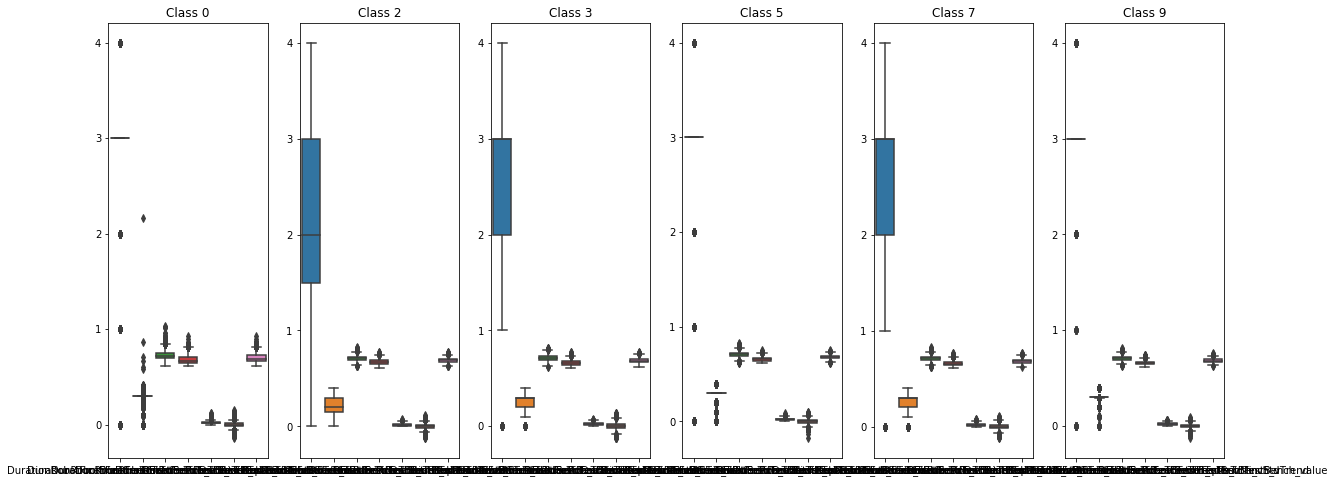

In [8]:
# fig = plt.figure(figsize=(10, 8), dpi=75)


classes = data_df_2['class'].unique()

fig, axes = plt.subplots(1, len(classes), sharex=True, figsize=(20,8))
# fig.suptitle('1 row x 2 columns axes with no data')

for idx, c in enumerate(classes):
    df = train_df[merged_df['class'] == c].copy()
#     df = train_df.copy()
    sns.boxplot(data=df, ax=axes[idx])
    axes[idx].set_title('Class '+str(c))


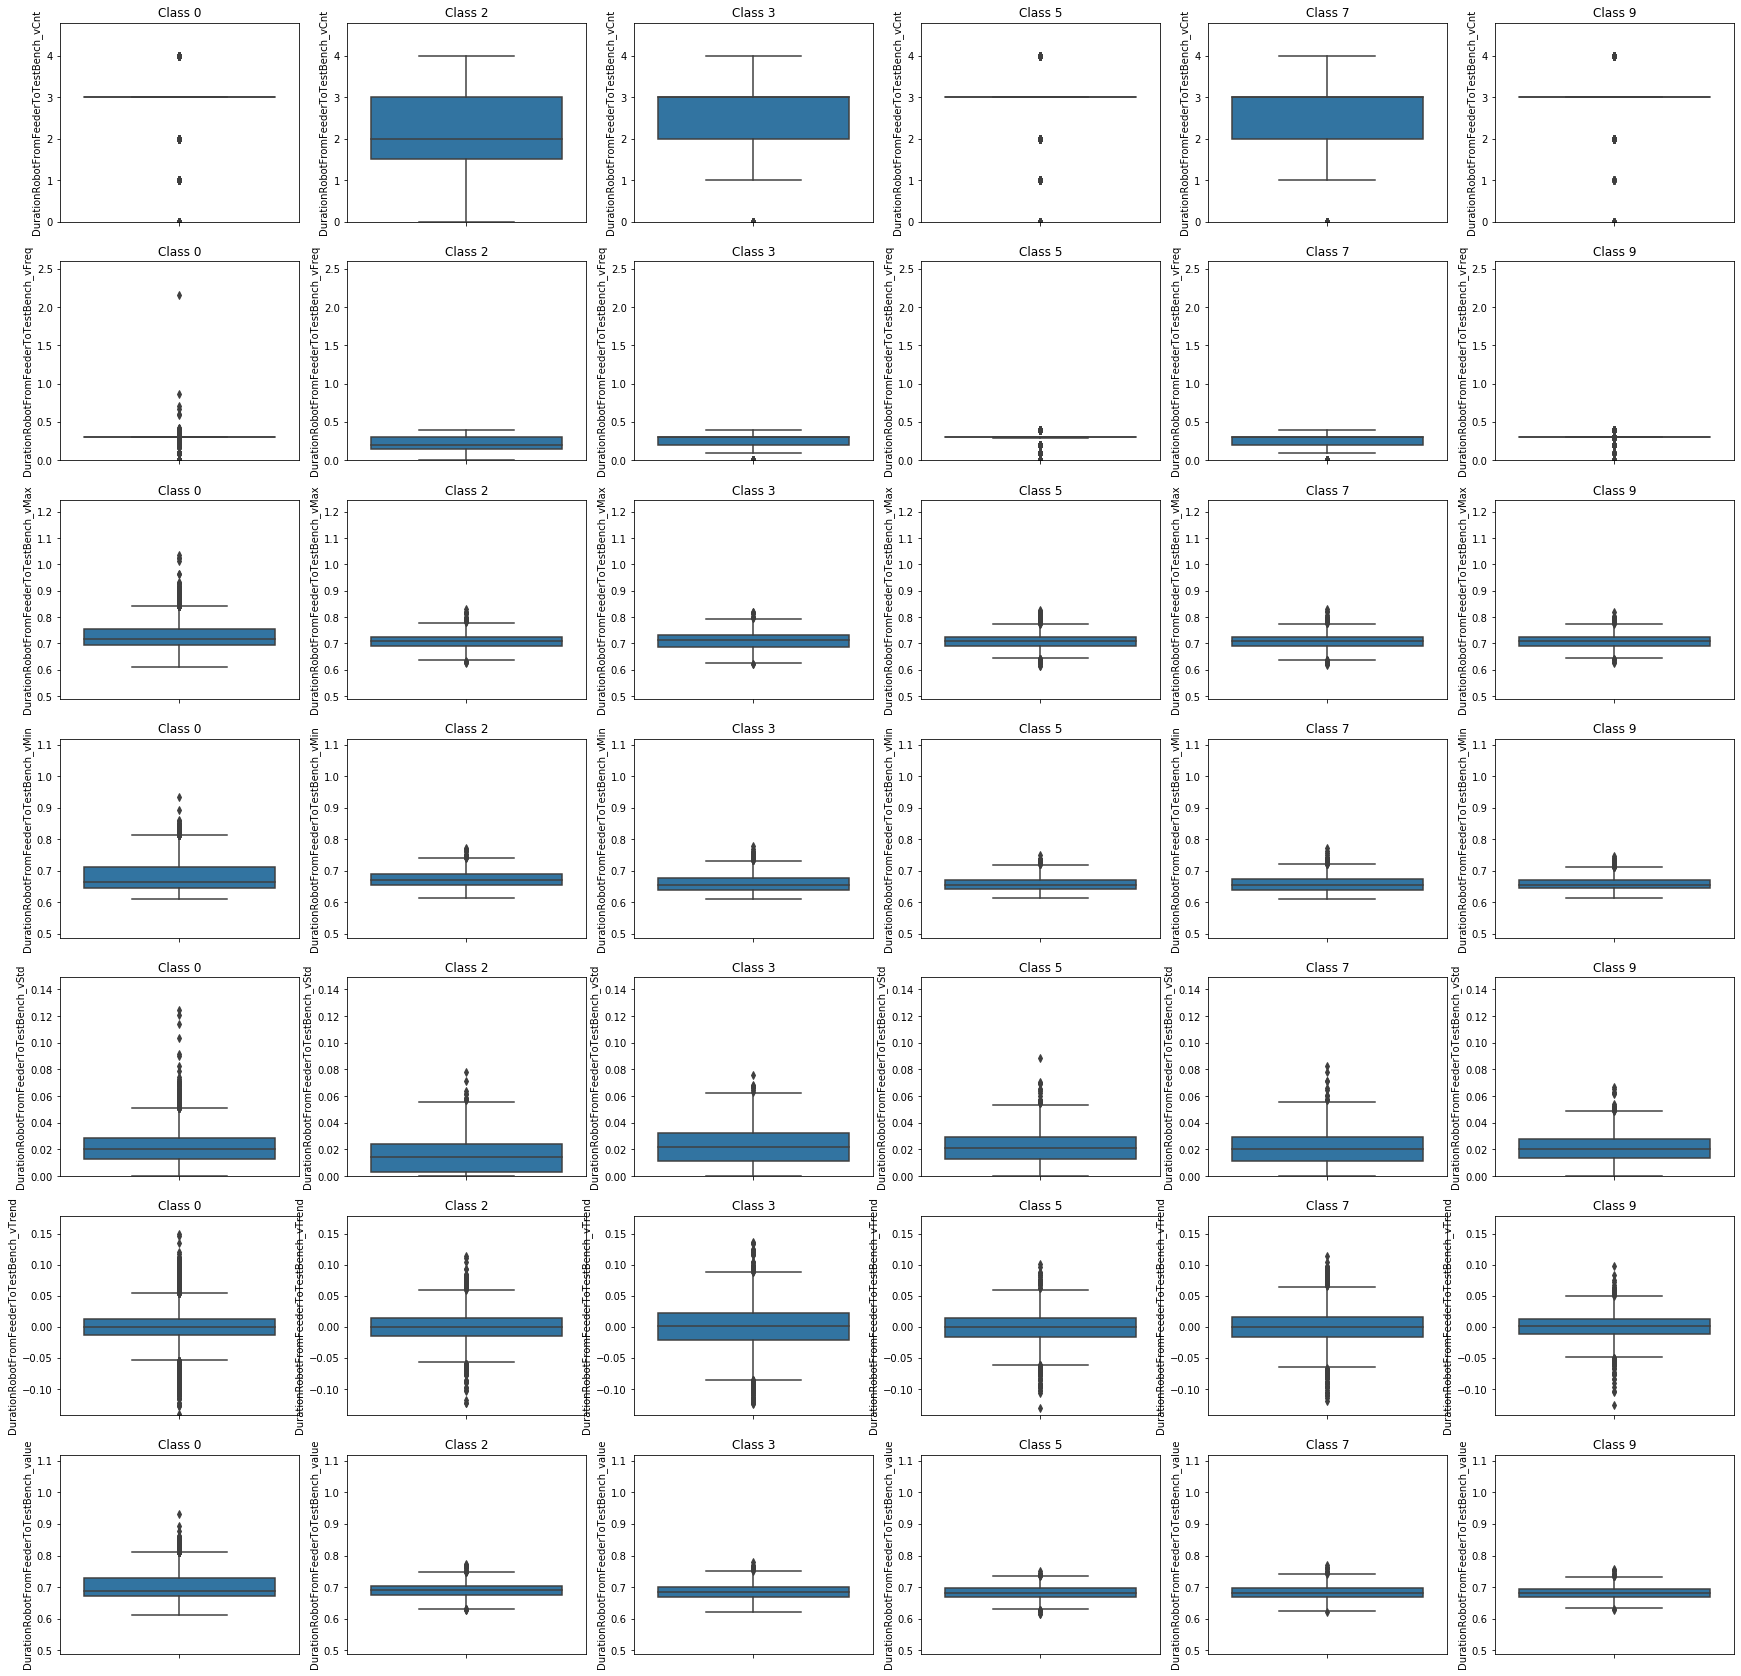

In [9]:
# fig = plt.figure(figsize=(10, 8), dpi=75)


classes = data_df_2['class'].unique()
features = train_df.columns

fig, axes = plt.subplots(len(features), len(classes), sharex=True, figsize=(30,30))
# print (axes)
# fig.suptitle('1 row x 2 columns axes with no data')

for idx1, f in enumerate(features):
    df = merged_df[[f, 'class']].copy()
    for idx2, c in enumerate(classes):
        df2 = df[df['class'] == c].copy()
#         print (f, c, df2.columns)
        sns.boxplot(y=df2[f], ax=axes[idx1, idx2])
        axes[idx1, idx2].set_title('Class '+str(c))
        axes[idx1, idx2].set_ylim(0.8*df[f].min(), 1.2*df[f].max())


In [10]:
# classes = data_df_2['class'].unique()
# features = train_df.columns

# fig, axes = plt.subplots(len(features), 1, sharex=True, figsize=(30,16))

# for idx1, f in enumerate(features):
#     df = data_df_2[[f, 'class']].copy()
#     axes[idx1].set_title('Feature '+str(f))
#     for idx2, c in enumerate(classes):
#         df2 = df[df['class'] == c].copy()
#         axes[idx1].boxplot(x=df2[f], positions=[idx2], labels=[c])
    


In [11]:
# train_df2 = pd.concat([data_df_2['class'], train_df], axis=1)
# axes = train_df2.groupby('class').boxplot(figsize=(20, 10))

In [12]:
classes = data_df_2['class'].unique()
features = train_df.columns

new_df = pd.DataFrame()

df_list = []

for idx1, f in enumerate(features):
    df = merged_df[[f, 'class']].copy()
    data = [[
        99, f, df[f].max(), df[f].min(), df[f].std(), df[f].mean(), df[f].median(), df[f].count(), df[f].isna().sum(),
        ]]

    data_df = pd.DataFrame(data)

    df_list.append(data_df)

    for idx2, c in enumerate(classes):
        df2 = df[df['class'] == c].copy()

        data = [[
            c, f, df2[f].max(), df2[f].min(), df2[f].std(), df2[f].mean(), df2[f].median(), df2[f].count(), df2[f].isna().sum(),
            ]]
        
        data_df = pd.DataFrame(data)
        df_list.append(data_df)
        
new_df = pd.concat(df_list, axis=0)
        
new_df.columns = ['class', 'feature', 'max', 'min', 'std', 'mean', 'median', 'Count', 'NA_count']

In [13]:
new_df[new_df['class']==99]

,class,feature,max,min,std,mean,median,Count,NA_count
0,99,DurationRobotFromFeederToTestBench_vCnt,4.000000,0.000,0.748129,2.913938,3.000000,39611,0
0,99,DurationRobotFromFeederToTestBench_vFreq,2.164281,0.000,0.075146,0.290077,0.298709,39611,0
0,99,DurationRobotFromFeederToTestBench_vMax,1.037000,0.612,0.046441,0.723350,0.714000,39038,573
0,99,DurationRobotFromFeederToTestBench_vMin,0.933000,0.610,0.043481,0.674733,0.662000,39038,573
0,99,DurationRobotFromFeederToTestBench_vStd,0.124151,0.000,0.011645,0.020781,0.020237,39038,573
0,99,DurationRobotFromFeederToTestBench_vTrend,0.149000,-0.177,0.024910,-0.000091,0.000500,37633,1978
0,99,DurationRobotFromFeederToTestBench_value,0.933000,0.612,0.042852,0.698786,0.686667,39038,573


In [14]:
% Skip

missing = 0

for c in classes:
    class_df = merged_df[merged_df['class']==c]
    runs = class_df['run'].unique()
    for r in runs:
        run_df = class_df[class_df['run'] == r]
        for f in features:
            f_df = run_df.filter([f]).copy().reset_index()
            del f_df['index']
            l = len(f_df)
            n_df = f_df[f_df[f].isna()]
#             if len(f_df) != len(n_df): print (c, r, f, len(f_df), len(n_df))
            if (len(n_df) == 0): continue
            missing += len(n_df)
            for i in list(n_df.index):
                if ((i == 0) | (i == l-1)): 
                    print ('NA at start or end')
                else:
                    print (c, r, f, len(f_df), list(n_df.index))
print (missing)

NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
0 11 DurationRobotFromFeederToTestBench_vTrend 361 [0, 88, 360]
NA at start or end
NA at start or end
NA at start or end
NA at start or end
0 17 DurationRobotFromFeederToTestBench_vMax 362 [0, 1, 361]
NA at start or end
NA at start or end
0 17 DurationRobotFromFeederToTestBench_vMin 362 [0, 1, 361]
NA at start or end
NA at start or end
0 17 DurationRobotFromFeederToTestBench_vStd 362 [0, 1, 361]
NA at start or end
NA at start or end
0 17 DurationRobotFromFeederToTestBench_vTrend 362 [0, 1, 361]
NA at start or end
NA at start or end
0 17 DurationRobotFromFeederToTestBench_value 362 [0, 1, 361]
NA at start or end
NA at start or end
NA at start or end
NA at start or end
N

NA at start or end
NA at start or end
NA at start or end
0 54 DurationRobotFromFeederToTestBench_vTrend 1077 [0, 1, 318, 644, 794, 1076]
0 54 DurationRobotFromFeederToTestBench_vTrend 1077 [0, 1, 318, 644, 794, 1076]
0 54 DurationRobotFromFeederToTestBench_vTrend 1077 [0, 1, 318, 644, 794, 1076]
0 54 DurationRobotFromFeederToTestBench_vTrend 1077 [0, 1, 318, 644, 794, 1076]
NA at start or end
NA at start or end
NA at start or end
0 55 DurationRobotFromFeederToTestBench_vMax 1078 [0, 1, 2]
0 55 DurationRobotFromFeederToTestBench_vMax 1078 [0, 1, 2]
NA at start or end
0 55 DurationRobotFromFeederToTestBench_vMin 1078 [0, 1, 2]
0 55 DurationRobotFromFeederToTestBench_vMin 1078 [0, 1, 2]
NA at start or end
0 55 DurationRobotFromFeederToTestBench_vStd 1078 [0, 1, 2]
0 55 DurationRobotFromFeederToTestBench_vStd 1078 [0, 1, 2]
NA at start or end
0 55 DurationRobotFromFeederToTestBench_vTrend 1078 [0, 1, 2, 3, 1038, 1077]
0 55 DurationRobotFromFeederToTestBench_vTrend 1078 [0, 1, 2, 3, 1038, 1

0 74 DurationRobotFromFeederToTestBench_vMax 360 [50, 232, 359]
0 74 DurationRobotFromFeederToTestBench_vMax 360 [50, 232, 359]
NA at start or end
0 74 DurationRobotFromFeederToTestBench_vMin 360 [50, 232, 359]
0 74 DurationRobotFromFeederToTestBench_vMin 360 [50, 232, 359]
NA at start or end
0 74 DurationRobotFromFeederToTestBench_vStd 360 [50, 232, 359]
0 74 DurationRobotFromFeederToTestBench_vStd 360 [50, 232, 359]
NA at start or end
0 74 DurationRobotFromFeederToTestBench_vTrend 360 [39, 48, 50, 58, 74, 100, 107, 114, 144, 174, 195, 231, 232, 238, 244, 311, 317, 358, 359]
0 74 DurationRobotFromFeederToTestBench_vTrend 360 [39, 48, 50, 58, 74, 100, 107, 114, 144, 174, 195, 231, 232, 238, 244, 311, 317, 358, 359]
0 74 DurationRobotFromFeederToTestBench_vTrend 360 [39, 48, 50, 58, 74, 100, 107, 114, 144, 174, 195, 231, 232, 238, 244, 311, 317, 358, 359]
0 74 DurationRobotFromFeederToTestBench_vTrend 360 [39, 48, 50, 58, 74, 100, 107, 114, 144, 174, 195, 231, 232, 238, 244, 311, 317, 3

0 77 DurationRobotFromFeederToTestBench_vStd 360 [0, 155, 168, 256, 327, 359]
0 77 DurationRobotFromFeederToTestBench_vStd 360 [0, 155, 168, 256, 327, 359]
0 77 DurationRobotFromFeederToTestBench_vStd 360 [0, 155, 168, 256, 327, 359]
NA at start or end
NA at start or end
0 77 DurationRobotFromFeederToTestBench_vTrend 360 [0, 3, 13, 14, 43, 73, 96, 116, 144, 147, 155, 166, 168, 188, 213, 214, 227, 230, 247, 256, 263, 264, 295, 315, 316, 327, 334, 356, 358, 359]
0 77 DurationRobotFromFeederToTestBench_vTrend 360 [0, 3, 13, 14, 43, 73, 96, 116, 144, 147, 155, 166, 168, 188, 213, 214, 227, 230, 247, 256, 263, 264, 295, 315, 316, 327, 334, 356, 358, 359]
0 77 DurationRobotFromFeederToTestBench_vTrend 360 [0, 3, 13, 14, 43, 73, 96, 116, 144, 147, 155, 166, 168, 188, 213, 214, 227, 230, 247, 256, 263, 264, 295, 315, 316, 327, 334, 356, 358, 359]
0 77 DurationRobotFromFeederToTestBench_vTrend 360 [0, 3, 13, 14, 43, 73, 96, 116, 144, 147, 155, 166, 168, 188, 213, 214, 227, 230, 247, 256, 263, 2

NA at start or end
0 9 DurationRobotFromFeederToTestBench_vMax 362 [0, 1, 361]
NA at start or end
NA at start or end
0 9 DurationRobotFromFeederToTestBench_vMin 362 [0, 1, 361]
NA at start or end
NA at start or end
0 9 DurationRobotFromFeederToTestBench_vStd 362 [0, 1, 361]
NA at start or end
NA at start or end
0 9 DurationRobotFromFeederToTestBench_vTrend 362 [0, 1, 361]
NA at start or end
NA at start or end
0 9 DurationRobotFromFeederToTestBench_value 362 [0, 1, 361]
NA at start or end
0 101 DurationRobotFromFeederToTestBench_vMax 361 [6, 201, 279, 281, 345, 359, 360]
0 101 DurationRobotFromFeederToTestBench_vMax 361 [6, 201, 279, 281, 345, 359, 360]
0 101 DurationRobotFromFeederToTestBench_vMax 361 [6, 201, 279, 281, 345, 359, 360]
0 101 DurationRobotFromFeederToTestBench_vMax 361 [6, 201, 279, 281, 345, 359, 360]
0 101 DurationRobotFromFeederToTestBench_vMax 361 [6, 201, 279, 281, 345, 359, 360]
0 101 DurationRobotFromFeederToTestBench_vMax 361 [6, 201, 279, 281, 345, 359, 360]
NA 

0 83 DurationRobotFromFeederToTestBench_vMax 361 [359, 360]
NA at start or end
0 83 DurationRobotFromFeederToTestBench_vMin 361 [359, 360]
NA at start or end
0 83 DurationRobotFromFeederToTestBench_vStd 361 [359, 360]
NA at start or end
NA at start or end
0 83 DurationRobotFromFeederToTestBench_vTrend 361 [0, 359, 360]
NA at start or end
0 83 DurationRobotFromFeederToTestBench_value 361 [359, 360]
NA at start or end
NA at start or end
0 86 DurationRobotFromFeederToTestBench_vMax 361 [0, 106, 129, 255, 359, 360]
0 86 DurationRobotFromFeederToTestBench_vMax 361 [0, 106, 129, 255, 359, 360]
0 86 DurationRobotFromFeederToTestBench_vMax 361 [0, 106, 129, 255, 359, 360]
0 86 DurationRobotFromFeederToTestBench_vMax 361 [0, 106, 129, 255, 359, 360]
NA at start or end
NA at start or end
0 86 DurationRobotFromFeederToTestBench_vMin 361 [0, 106, 129, 255, 359, 360]
0 86 DurationRobotFromFeederToTestBench_vMin 361 [0, 106, 129, 255, 359, 360]
0 86 DurationRobotFromFeederToTestBench_vMin 361 [0, 10

0 90 DurationRobotFromFeederToTestBench_vTrend 357 [17, 37, 68, 84, 88, 111, 117, 167, 187, 196, 198, 235, 246, 262, 274, 285, 298, 310, 334, 345, 356]
0 90 DurationRobotFromFeederToTestBench_vTrend 357 [17, 37, 68, 84, 88, 111, 117, 167, 187, 196, 198, 235, 246, 262, 274, 285, 298, 310, 334, 345, 356]
0 90 DurationRobotFromFeederToTestBench_vTrend 357 [17, 37, 68, 84, 88, 111, 117, 167, 187, 196, 198, 235, 246, 262, 274, 285, 298, 310, 334, 345, 356]
0 90 DurationRobotFromFeederToTestBench_vTrend 357 [17, 37, 68, 84, 88, 111, 117, 167, 187, 196, 198, 235, 246, 262, 274, 285, 298, 310, 334, 345, 356]
NA at start or end
0 90 DurationRobotFromFeederToTestBench_value 357 [84, 187, 196, 310, 356]
0 90 DurationRobotFromFeederToTestBench_value 357 [84, 187, 196, 310, 356]
0 90 DurationRobotFromFeederToTestBench_value 357 [84, 187, 196, 310, 356]
0 90 DurationRobotFromFeederToTestBench_value 357 [84, 187, 196, 310, 356]
NA at start or end
NA at start or end
0 91 DurationRobotFromFeederToTestB

0 96 DurationRobotFromFeederToTestBench_vMin 359 [0, 33, 56, 69, 123, 196, 230, 357, 358]
0 96 DurationRobotFromFeederToTestBench_vMin 359 [0, 33, 56, 69, 123, 196, 230, 357, 358]
0 96 DurationRobotFromFeederToTestBench_vMin 359 [0, 33, 56, 69, 123, 196, 230, 357, 358]
0 96 DurationRobotFromFeederToTestBench_vMin 359 [0, 33, 56, 69, 123, 196, 230, 357, 358]
NA at start or end
NA at start or end
0 96 DurationRobotFromFeederToTestBench_vStd 359 [0, 33, 56, 69, 123, 196, 230, 357, 358]
0 96 DurationRobotFromFeederToTestBench_vStd 359 [0, 33, 56, 69, 123, 196, 230, 357, 358]
0 96 DurationRobotFromFeederToTestBench_vStd 359 [0, 33, 56, 69, 123, 196, 230, 357, 358]
0 96 DurationRobotFromFeederToTestBench_vStd 359 [0, 33, 56, 69, 123, 196, 230, 357, 358]
0 96 DurationRobotFromFeederToTestBench_vStd 359 [0, 33, 56, 69, 123, 196, 230, 357, 358]
0 96 DurationRobotFromFeederToTestBench_vStd 359 [0, 33, 56, 69, 123, 196, 230, 357, 358]
0 96 DurationRobotFromFeederToTestBench_vStd 359 [0, 33, 56, 6

0 97 DurationRobotFromFeederToTestBench_vMin 361 [207, 292, 331, 359, 360]
0 97 DurationRobotFromFeederToTestBench_vMin 361 [207, 292, 331, 359, 360]
NA at start or end
0 97 DurationRobotFromFeederToTestBench_vStd 361 [207, 292, 331, 359, 360]
0 97 DurationRobotFromFeederToTestBench_vStd 361 [207, 292, 331, 359, 360]
0 97 DurationRobotFromFeederToTestBench_vStd 361 [207, 292, 331, 359, 360]
0 97 DurationRobotFromFeederToTestBench_vStd 361 [207, 292, 331, 359, 360]
NA at start or end
NA at start or end
0 97 DurationRobotFromFeederToTestBench_vTrend 361 [0, 10, 11, 16, 23, 25, 28, 40, 45, 49, 52, 56, 57, 59, 68, 71, 86, 91, 97, 98, 115, 128, 138, 140, 164, 187, 194, 204, 207, 216, 220, 230, 232, 233, 237, 244, 245, 267, 273, 276, 277, 291, 292, 305, 318, 331, 359, 360]
0 97 DurationRobotFromFeederToTestBench_vTrend 361 [0, 10, 11, 16, 23, 25, 28, 40, 45, 49, 52, 56, 57, 59, 68, 71, 86, 91, 97, 98, 115, 128, 138, 140, 164, 187, 194, 204, 207, 216, 220, 230, 232, 233, 237, 244, 245, 267, 2

2 2 DurationRobotFromFeederToTestBench_vMin 1079 [0, 1, 109, 117, 118, 224, 247, 250, 251, 420, 466, 468, 532, 594, 597, 598, 600, 601, 629, 657, 662, 663, 664, 682, 696, 717, 720, 782, 813, 843, 874, 894, 896, 897, 900, 929, 953, 983, 985, 986, 1022, 1045, 1072, 1078]
2 2 DurationRobotFromFeederToTestBench_vMin 1079 [0, 1, 109, 117, 118, 224, 247, 250, 251, 420, 466, 468, 532, 594, 597, 598, 600, 601, 629, 657, 662, 663, 664, 682, 696, 717, 720, 782, 813, 843, 874, 894, 896, 897, 900, 929, 953, 983, 985, 986, 1022, 1045, 1072, 1078]
2 2 DurationRobotFromFeederToTestBench_vMin 1079 [0, 1, 109, 117, 118, 224, 247, 250, 251, 420, 466, 468, 532, 594, 597, 598, 600, 601, 629, 657, 662, 663, 664, 682, 696, 717, 720, 782, 813, 843, 874, 894, 896, 897, 900, 929, 953, 983, 985, 986, 1022, 1045, 1072, 1078]
2 2 DurationRobotFromFeederToTestBench_vMin 1079 [0, 1, 109, 117, 118, 224, 247, 250, 251, 420, 466, 468, 532, 594, 597, 598, 600, 601, 629, 657, 662, 663, 664, 682, 696, 717, 720, 782, 813,

2 2 DurationRobotFromFeederToTestBench_vTrend 1079 [0, 1, 2, 39, 57, 59, 60, 61, 63, 65, 100, 104, 107, 109, 112, 113, 115, 117, 118, 119, 133, 134, 136, 138, 144, 219, 222, 223, 224, 247, 248, 249, 250, 251, 254, 275, 280, 283, 312, 314, 318, 321, 323, 324, 404, 420, 421, 423, 426, 429, 461, 466, 468, 470, 472, 474, 490, 500, 502, 503, 504, 505, 522, 524, 529, 531, 532, 564, 565, 568, 587, 588, 592, 594, 595, 597, 598, 599, 600, 601, 617, 618, 621, 622, 626, 627, 628, 629, 630, 632, 633, 649, 650, 654, 655, 657, 660, 661, 662, 663, 664, 665, 679, 682, 685, 688, 689, 691, 693, 696, 711, 712, 713, 716, 717, 718, 720, 722, 723, 735, 744, 762, 763, 766, 770, 772, 773, 774, 782, 783, 797, 800, 802, 803, 805, 806, 808, 809, 811, 813, 831, 833, 834, 836, 837, 838, 840, 841, 843, 846, 861, 863, 868, 871, 872, 873, 874, 875, 890, 891, 892, 893, 894, 896, 897, 899, 900, 916, 917, 919, 923, 926, 928, 929, 953, 955, 956, 957, 978, 981, 983, 985, 986, 989, 990, 993, 1016, 1017, 1018, 1022, 1023, 1

2 2 DurationRobotFromFeederToTestBench_value 1079 [0, 1, 109, 117, 118, 224, 247, 250, 251, 420, 466, 468, 532, 594, 597, 598, 600, 601, 629, 657, 662, 663, 664, 682, 696, 717, 720, 782, 813, 843, 874, 894, 896, 897, 900, 929, 953, 983, 985, 986, 1022, 1045, 1072, 1078]
2 2 DurationRobotFromFeederToTestBench_value 1079 [0, 1, 109, 117, 118, 224, 247, 250, 251, 420, 466, 468, 532, 594, 597, 598, 600, 601, 629, 657, 662, 663, 664, 682, 696, 717, 720, 782, 813, 843, 874, 894, 896, 897, 900, 929, 953, 983, 985, 986, 1022, 1045, 1072, 1078]
2 2 DurationRobotFromFeederToTestBench_value 1079 [0, 1, 109, 117, 118, 224, 247, 250, 251, 420, 466, 468, 532, 594, 597, 598, 600, 601, 629, 657, 662, 663, 664, 682, 696, 717, 720, 782, 813, 843, 874, 894, 896, 897, 900, 929, 953, 983, 985, 986, 1022, 1045, 1072, 1078]
2 2 DurationRobotFromFeederToTestBench_value 1079 [0, 1, 109, 117, 118, 224, 247, 250, 251, 420, 466, 468, 532, 594, 597, 598, 600, 601, 629, 657, 662, 663, 664, 682, 696, 717, 720, 782, 

2 3 DurationRobotFromFeederToTestBench_vMax 1035 [0, 1, 2, 3, 28, 30, 33, 34, 38, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 58, 59, 60, 61, 63, 64, 65, 66, 67, 72, 73, 74, 75, 115, 119, 120, 121, 123, 125, 126, 127, 130, 169, 170, 171, 172, 177, 178, 179, 182, 183, 188, 190, 196, 199, 211, 212, 214, 215, 216, 217, 218, 222, 223, 224, 225, 276, 359, 360, 367, 368, 370, 373, 374, 376, 378, 402, 404, 409, 414, 417, 450, 459, 460, 467, 473, 525, 530, 535, 538, 539, 543, 561, 567, 568, 569, 570, 576, 578, 580, 583, 584, 585, 588, 644, 651, 656, 657, 659, 661, 662, 665, 667, 711, 712, 762, 764, 771, 823, 824, 827, 884, 890, 896, 898, 899, 902, 903, 905, 925, 926, 933, 934, 966, 974, 976, 1015, 1025, 1026, 1027, 1028, 1029, 1030, 1031]
2 3 DurationRobotFromFeederToTestBench_vMax 1035 [0, 1, 2, 3, 28, 30, 33, 34, 38, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 58, 59, 60, 61, 63, 64, 65, 66, 67, 72, 73, 74, 75, 115, 119, 120, 121, 123, 125, 126, 127, 130, 169, 170, 171, 172, 177, 178, 179, 1

2 3 DurationRobotFromFeederToTestBench_vStd 1035 [0, 1, 2, 3, 28, 30, 33, 34, 38, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 58, 59, 60, 61, 63, 64, 65, 66, 67, 72, 73, 74, 75, 115, 119, 120, 121, 123, 125, 126, 127, 130, 169, 170, 171, 172, 177, 178, 179, 182, 183, 188, 190, 196, 199, 211, 212, 214, 215, 216, 217, 218, 222, 223, 224, 225, 276, 359, 360, 367, 368, 370, 373, 374, 376, 378, 402, 404, 409, 414, 417, 450, 459, 460, 467, 473, 525, 530, 535, 538, 539, 543, 561, 567, 568, 569, 570, 576, 578, 580, 583, 584, 585, 588, 644, 651, 656, 657, 659, 661, 662, 665, 667, 711, 712, 762, 764, 771, 823, 824, 827, 884, 890, 896, 898, 899, 902, 903, 905, 925, 926, 933, 934, 966, 974, 976, 1015, 1025, 1026, 1027, 1028, 1029, 1030, 1031]
2 3 DurationRobotFromFeederToTestBench_vStd 1035 [0, 1, 2, 3, 28, 30, 33, 34, 38, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 58, 59, 60, 61, 63, 64, 65, 66, 67, 72, 73, 74, 75, 115, 119, 120, 121, 123, 125, 126, 127, 130, 169, 170, 171, 172, 177, 178, 179, 1

2 3 DurationRobotFromFeederToTestBench_vTrend 1035 [0, 1, 2, 3, 4, 20, 25, 27, 28, 30, 31, 32, 33, 34, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 56, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 71, 72, 73, 74, 75, 76, 77, 78, 112, 114, 115, 116, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 130, 164, 165, 166, 168, 169, 170, 171, 172, 173, 174, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 209, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 227, 275, 276, 278, 279, 359, 360, 361, 365, 367, 368, 370, 371, 373, 374, 376, 377, 378, 379, 380, 395, 400, 402, 403, 404, 405, 409, 410, 411, 412, 413, 414, 415, 416, 417, 449, 450, 451, 452, 454, 455, 457, 458, 459, 460, 461, 462, 463, 464, 465, 467, 468, 470, 473, 519, 521, 523, 524, 525, 526, 528, 530, 532, 533, 535, 536, 538, 539, 540, 541, 542, 543, 544, 559, 561, 565, 567,

2 3 DurationRobotFromFeederToTestBench_vTrend 1035 [0, 1, 2, 3, 4, 20, 25, 27, 28, 30, 31, 32, 33, 34, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 56, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 71, 72, 73, 74, 75, 76, 77, 78, 112, 114, 115, 116, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 130, 164, 165, 166, 168, 169, 170, 171, 172, 173, 174, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 209, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 227, 275, 276, 278, 279, 359, 360, 361, 365, 367, 368, 370, 371, 373, 374, 376, 377, 378, 379, 380, 395, 400, 402, 403, 404, 405, 409, 410, 411, 412, 413, 414, 415, 416, 417, 449, 450, 451, 452, 454, 455, 457, 458, 459, 460, 461, 462, 463, 464, 465, 467, 468, 470, 473, 519, 521, 523, 524, 525, 526, 528, 530, 532, 533, 535, 536, 538, 539, 540, 541, 542, 543, 544, 559, 561, 565, 567,

2 3 DurationRobotFromFeederToTestBench_value 1035 [0, 1, 2, 3, 28, 30, 33, 34, 38, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 58, 59, 60, 61, 63, 64, 65, 66, 67, 72, 73, 74, 75, 115, 119, 120, 121, 123, 125, 126, 127, 130, 169, 170, 171, 172, 177, 178, 179, 182, 183, 188, 190, 196, 199, 211, 212, 214, 215, 216, 217, 218, 222, 223, 224, 225, 276, 359, 360, 367, 368, 370, 373, 374, 376, 378, 402, 404, 409, 414, 417, 450, 459, 460, 467, 473, 525, 530, 535, 538, 539, 543, 561, 567, 568, 569, 570, 576, 578, 580, 583, 584, 585, 588, 644, 651, 656, 657, 659, 661, 662, 665, 667, 711, 712, 762, 764, 771, 823, 824, 827, 884, 890, 896, 898, 899, 902, 903, 905, 925, 926, 933, 934, 966, 974, 976, 1015, 1025, 1026, 1027, 1028, 1029, 1030, 1031]
2 3 DurationRobotFromFeederToTestBench_value 1035 [0, 1, 2, 3, 28, 30, 33, 34, 38, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 58, 59, 60, 61, 63, 64, 65, 66, 67, 72, 73, 74, 75, 115, 119, 120, 121, 123, 125, 126, 127, 130, 169, 170, 171, 172, 177, 178, 179,

2 4 DurationRobotFromFeederToTestBench_vMax 360 [80, 86, 92, 93, 97, 98, 105, 121, 134, 136, 138, 139, 140, 159, 169, 192, 197, 198, 218, 224, 226, 229, 231, 256, 258, 260, 285, 293, 297, 339, 350, 356, 359]
2 4 DurationRobotFromFeederToTestBench_vMax 360 [80, 86, 92, 93, 97, 98, 105, 121, 134, 136, 138, 139, 140, 159, 169, 192, 197, 198, 218, 224, 226, 229, 231, 256, 258, 260, 285, 293, 297, 339, 350, 356, 359]
NA at start or end
2 4 DurationRobotFromFeederToTestBench_vMin 360 [80, 86, 92, 93, 97, 98, 105, 121, 134, 136, 138, 139, 140, 159, 169, 192, 197, 198, 218, 224, 226, 229, 231, 256, 258, 260, 285, 293, 297, 339, 350, 356, 359]
2 4 DurationRobotFromFeederToTestBench_vMin 360 [80, 86, 92, 93, 97, 98, 105, 121, 134, 136, 138, 139, 140, 159, 169, 192, 197, 198, 218, 224, 226, 229, 231, 256, 258, 260, 285, 293, 297, 339, 350, 356, 359]
2 4 DurationRobotFromFeederToTestBench_vMin 360 [80, 86, 92, 93, 97, 98, 105, 121, 134, 136, 138, 139, 140, 159, 169, 192, 197, 198, 218, 224, 226, 2

2 4 DurationRobotFromFeederToTestBench_value 360 [80, 86, 92, 93, 97, 98, 105, 121, 134, 136, 138, 139, 140, 159, 169, 192, 197, 198, 218, 224, 226, 229, 231, 256, 258, 260, 285, 293, 297, 339, 350, 356, 359]
2 4 DurationRobotFromFeederToTestBench_value 360 [80, 86, 92, 93, 97, 98, 105, 121, 134, 136, 138, 139, 140, 159, 169, 192, 197, 198, 218, 224, 226, 229, 231, 256, 258, 260, 285, 293, 297, 339, 350, 356, 359]
2 4 DurationRobotFromFeederToTestBench_value 360 [80, 86, 92, 93, 97, 98, 105, 121, 134, 136, 138, 139, 140, 159, 169, 192, 197, 198, 218, 224, 226, 229, 231, 256, 258, 260, 285, 293, 297, 339, 350, 356, 359]
2 4 DurationRobotFromFeederToTestBench_value 360 [80, 86, 92, 93, 97, 98, 105, 121, 134, 136, 138, 139, 140, 159, 169, 192, 197, 198, 218, 224, 226, 229, 231, 256, 258, 260, 285, 293, 297, 339, 350, 356, 359]
2 4 DurationRobotFromFeederToTestBench_value 360 [80, 86, 92, 93, 97, 98, 105, 121, 134, 136, 138, 139, 140, 159, 169, 192, 197, 198, 218, 224, 226, 229, 231, 256, 

3 2 DurationRobotFromFeederToTestBench_vTrend 1079 [0, 1, 2, 3, 123, 142, 210, 233, 245, 269, 280, 292, 318, 321, 350, 372, 395, 428, 440, 459, 489, 502, 512, 516, 522, 537, 566, 574, 582, 591, 603, 621, 671, 677, 690, 709, 749, 757, 758, 767, 775, 784, 809, 811, 818, 820, 829, 840, 874, 877, 947, 956, 965, 982, 992, 1028, 1041, 1070]
3 2 DurationRobotFromFeederToTestBench_vTrend 1079 [0, 1, 2, 3, 123, 142, 210, 233, 245, 269, 280, 292, 318, 321, 350, 372, 395, 428, 440, 459, 489, 502, 512, 516, 522, 537, 566, 574, 582, 591, 603, 621, 671, 677, 690, 709, 749, 757, 758, 767, 775, 784, 809, 811, 818, 820, 829, 840, 874, 877, 947, 956, 965, 982, 992, 1028, 1041, 1070]
3 2 DurationRobotFromFeederToTestBench_vTrend 1079 [0, 1, 2, 3, 123, 142, 210, 233, 245, 269, 280, 292, 318, 321, 350, 372, 395, 428, 440, 459, 489, 502, 512, 516, 522, 537, 566, 574, 582, 591, 603, 621, 671, 677, 690, 709, 749, 757, 758, 767, 775, 784, 809, 811, 818, 820, 829, 840, 874, 877, 947, 956, 965, 982, 992, 1028, 1

NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
3 4 DurationRobotFromFeederToTestBench_vTrend 361 [0, 27, 30, 89, 92, 123, 139, 149, 158, 166, 171, 218, 228, 235, 281, 299, 320, 359, 360]
3 4 DurationRobotFromFeederToTestBench_vTrend 361 [0, 27, 30, 89, 92, 123, 139, 149, 158, 166, 171, 218, 228, 235, 281, 299, 320, 359, 360]
3 4 DurationRobotFromFeederToTestBench_vTrend 361 [0, 27, 30, 89, 92, 123, 139, 149, 158, 166, 171, 218, 228, 235, 281, 299, 320, 359, 360]
3 4 DurationRobotFromFeederToTestBench_vTrend 361 [0, 27, 30, 89, 92, 123, 139, 149, 158, 166, 171, 218, 228, 235, 281, 299, 320, 359, 360]
3 4 DurationRobotFromFeederToTestBench_vTrend 361 [0, 27, 30, 89, 92, 123, 139, 149, 158, 166, 171, 218, 228, 235, 281, 299, 320, 359, 360]
3 4 DurationRobotFromFeederToTestBench_vTrend 361 [0, 27, 30, 89, 92, 123, 139, 149, 158, 166, 171, 218, 228, 235, 281, 299, 320, 359, 360]
3 4 DurationRobotFromFeeder

NA at start or end
5 2 DurationRobotFromFeederToTestBench_vMax 1078 [0, 1, 2, 3, 47, 80, 211, 222, 276, 374, 396, 472, 483, 527, 592, 603, 619, 690, 701, 712, 723, 810, 832, 930, 941, 952, 1050]
5 2 DurationRobotFromFeederToTestBench_vMax 1078 [0, 1, 2, 3, 47, 80, 211, 222, 276, 374, 396, 472, 483, 527, 592, 603, 619, 690, 701, 712, 723, 810, 832, 930, 941, 952, 1050]
5 2 DurationRobotFromFeederToTestBench_vMax 1078 [0, 1, 2, 3, 47, 80, 211, 222, 276, 374, 396, 472, 483, 527, 592, 603, 619, 690, 701, 712, 723, 810, 832, 930, 941, 952, 1050]
5 2 DurationRobotFromFeederToTestBench_vMax 1078 [0, 1, 2, 3, 47, 80, 211, 222, 276, 374, 396, 472, 483, 527, 592, 603, 619, 690, 701, 712, 723, 810, 832, 930, 941, 952, 1050]
5 2 DurationRobotFromFeederToTestBench_vMax 1078 [0, 1, 2, 3, 47, 80, 211, 222, 276, 374, 396, 472, 483, 527, 592, 603, 619, 690, 701, 712, 723, 810, 832, 930, 941, 952, 1050]
5 2 DurationRobotFromFeederToTestBench_vMax 1078 [0, 1, 2, 3, 47, 80, 211, 222, 276, 374, 396, 472, 4

5 2 DurationRobotFromFeederToTestBench_value 1078 [0, 1, 2, 3, 47, 80, 211, 222, 276, 374, 396, 472, 483, 527, 592, 603, 619, 690, 701, 712, 723, 810, 832, 930, 941, 952, 1050]
5 2 DurationRobotFromFeederToTestBench_value 1078 [0, 1, 2, 3, 47, 80, 211, 222, 276, 374, 396, 472, 483, 527, 592, 603, 619, 690, 701, 712, 723, 810, 832, 930, 941, 952, 1050]
5 2 DurationRobotFromFeederToTestBench_value 1078 [0, 1, 2, 3, 47, 80, 211, 222, 276, 374, 396, 472, 483, 527, 592, 603, 619, 690, 701, 712, 723, 810, 832, 930, 941, 952, 1050]
5 2 DurationRobotFromFeederToTestBench_value 1078 [0, 1, 2, 3, 47, 80, 211, 222, 276, 374, 396, 472, 483, 527, 592, 603, 619, 690, 701, 712, 723, 810, 832, 930, 941, 952, 1050]
5 2 DurationRobotFromFeederToTestBench_value 1078 [0, 1, 2, 3, 47, 80, 211, 222, 276, 374, 396, 472, 483, 527, 592, 603, 619, 690, 701, 712, 723, 810, 832, 930, 941, 952, 1050]
5 2 DurationRobotFromFeederToTestBench_value 1078 [0, 1, 2, 3, 47, 80, 211, 222, 276, 374, 396, 472, 483, 527, 592,

5 3 DurationRobotFromFeederToTestBench_vTrend 1079 [0, 1, 2, 3, 14, 25, 36, 47, 57, 58, 68, 79, 90, 101, 112, 123, 134, 144, 155, 166, 177, 188, 199, 210, 221, 236, 253, 264, 265, 275, 286, 297, 308, 319, 351, 362, 373, 384, 395, 406, 417, 428, 439, 471, 482, 493, 500, 504, 515, 526, 537, 558, 569, 580, 591, 602, 613, 645, 656, 667, 678, 689, 700, 711, 722, 765, 776, 787, 798, 809, 831, 841, 850, 852, 863, 872, 874, 885, 890, 896, 907, 918, 929, 961, 972, 983, 994, 1005, 1016, 1038, 1048, 1059, 1070, 1078]
5 3 DurationRobotFromFeederToTestBench_vTrend 1079 [0, 1, 2, 3, 14, 25, 36, 47, 57, 58, 68, 79, 90, 101, 112, 123, 134, 144, 155, 166, 177, 188, 199, 210, 221, 236, 253, 264, 265, 275, 286, 297, 308, 319, 351, 362, 373, 384, 395, 406, 417, 428, 439, 471, 482, 493, 500, 504, 515, 526, 537, 558, 569, 580, 591, 602, 613, 645, 656, 667, 678, 689, 700, 711, 722, 765, 776, 787, 798, 809, 831, 841, 850, 852, 863, 872, 874, 885, 890, 896, 907, 918, 929, 961, 972, 983, 994, 1005, 1016, 1038, 

5 4 DurationRobotFromFeederToTestBench_vMin 360 [22, 87, 98, 120, 185, 207, 218, 251, 338, 349, 359]
NA at start or end
5 4 DurationRobotFromFeederToTestBench_vStd 360 [22, 87, 98, 120, 185, 207, 218, 251, 338, 349, 359]
5 4 DurationRobotFromFeederToTestBench_vStd 360 [22, 87, 98, 120, 185, 207, 218, 251, 338, 349, 359]
5 4 DurationRobotFromFeederToTestBench_vStd 360 [22, 87, 98, 120, 185, 207, 218, 251, 338, 349, 359]
5 4 DurationRobotFromFeederToTestBench_vStd 360 [22, 87, 98, 120, 185, 207, 218, 251, 338, 349, 359]
5 4 DurationRobotFromFeederToTestBench_vStd 360 [22, 87, 98, 120, 185, 207, 218, 251, 338, 349, 359]
5 4 DurationRobotFromFeederToTestBench_vStd 360 [22, 87, 98, 120, 185, 207, 218, 251, 338, 349, 359]
5 4 DurationRobotFromFeederToTestBench_vStd 360 [22, 87, 98, 120, 185, 207, 218, 251, 338, 349, 359]
5 4 DurationRobotFromFeederToTestBench_vStd 360 [22, 87, 98, 120, 185, 207, 218, 251, 338, 349, 359]
5 4 DurationRobotFromFeederToTestBench_vStd 360 [22, 87, 98, 120, 185, 2

7 2 DurationRobotFromFeederToTestBench_vTrend 1080 [0, 1, 2, 3, 4, 35, 37, 42, 49, 50, 54, 55, 57, 68, 84, 86, 90, 92, 96, 144, 168, 175, 223, 234, 251, 271, 272, 274, 279, 283, 284, 289, 297, 324, 333, 353, 355, 361, 367, 379, 386, 391, 394, 419, 420, 424, 426, 431, 448, 456, 457, 471, 476, 501, 503, 514, 520, 522, 526, 529, 545, 548, 557, 559, 568, 597, 603, 606, 610, 616, 617, 618, 655, 657, 658, 662, 664, 666, 669, 695, 704, 712, 732, 736, 760, 761, 769, 770, 799, 811, 821, 827, 831, 833, 856, 858, 878, 881, 883, 888, 913, 925, 928, 931, 962, 967, 1065, 1073, 1079]
7 2 DurationRobotFromFeederToTestBench_vTrend 1080 [0, 1, 2, 3, 4, 35, 37, 42, 49, 50, 54, 55, 57, 68, 84, 86, 90, 92, 96, 144, 168, 175, 223, 234, 251, 271, 272, 274, 279, 283, 284, 289, 297, 324, 333, 353, 355, 361, 367, 379, 386, 391, 394, 419, 420, 424, 426, 431, 448, 456, 457, 471, 476, 501, 503, 514, 520, 522, 526, 529, 545, 548, 557, 559, 568, 597, 603, 606, 610, 616, 617, 618, 655, 657, 658, 662, 664, 666, 669, 6

7 3 DurationRobotFromFeederToTestBench_vTrend 1079 [0, 1, 2, 3, 23, 36, 39, 41, 50, 60, 72, 75, 87, 97, 103, 104, 108, 127, 138, 143, 150, 178, 220, 239, 247, 254, 316, 372, 386, 401, 411, 443, 444, 545, 558, 563, 564, 580, 627, 629, 631, 635, 637, 638, 640, 643, 670, 672, 698, 700, 703, 712, 715, 753, 755, 778, 780, 781, 782, 784, 786, 787, 793, 796, 800, 821, 835, 838, 853, 862, 865, 866, 867, 872, 875, 891, 899, 921, 925, 931, 945, 958, 978, 988, 992, 993, 1014, 1033, 1063, 1065, 1070, 1072, 1076, 1078]
7 3 DurationRobotFromFeederToTestBench_vTrend 1079 [0, 1, 2, 3, 23, 36, 39, 41, 50, 60, 72, 75, 87, 97, 103, 104, 108, 127, 138, 143, 150, 178, 220, 239, 247, 254, 316, 372, 386, 401, 411, 443, 444, 545, 558, 563, 564, 580, 627, 629, 631, 635, 637, 638, 640, 643, 670, 672, 698, 700, 703, 712, 715, 753, 755, 778, 780, 781, 782, 784, 786, 787, 793, 796, 800, 821, 835, 838, 853, 862, 865, 866, 867, 872, 875, 891, 899, 921, 925, 931, 945, 958, 978, 988, 992, 993, 1014, 1033, 1063, 1065, 

7 5 DurationRobotFromFeederToTestBench_vMin 361 [0, 22, 34, 76, 77, 94, 107, 133, 147, 213, 228, 242, 270, 297, 360]
7 5 DurationRobotFromFeederToTestBench_vMin 361 [0, 22, 34, 76, 77, 94, 107, 133, 147, 213, 228, 242, 270, 297, 360]
7 5 DurationRobotFromFeederToTestBench_vMin 361 [0, 22, 34, 76, 77, 94, 107, 133, 147, 213, 228, 242, 270, 297, 360]
7 5 DurationRobotFromFeederToTestBench_vMin 361 [0, 22, 34, 76, 77, 94, 107, 133, 147, 213, 228, 242, 270, 297, 360]
7 5 DurationRobotFromFeederToTestBench_vMin 361 [0, 22, 34, 76, 77, 94, 107, 133, 147, 213, 228, 242, 270, 297, 360]
7 5 DurationRobotFromFeederToTestBench_vMin 361 [0, 22, 34, 76, 77, 94, 107, 133, 147, 213, 228, 242, 270, 297, 360]
7 5 DurationRobotFromFeederToTestBench_vMin 361 [0, 22, 34, 76, 77, 94, 107, 133, 147, 213, 228, 242, 270, 297, 360]
7 5 DurationRobotFromFeederToTestBench_vMin 361 [0, 22, 34, 76, 77, 94, 107, 133, 147, 213, 228, 242, 270, 297, 360]
7 5 DurationRobotFromFeederToTestBench_vMin 361 [0, 22, 34, 76, 

NA at start or end
9 2 DurationRobotFromFeederToTestBench_vMax 1080 [0, 1, 2, 3]
9 2 DurationRobotFromFeederToTestBench_vMax 1080 [0, 1, 2, 3]
9 2 DurationRobotFromFeederToTestBench_vMax 1080 [0, 1, 2, 3]
NA at start or end
9 2 DurationRobotFromFeederToTestBench_vMin 1080 [0, 1, 2, 3]
9 2 DurationRobotFromFeederToTestBench_vMin 1080 [0, 1, 2, 3]
9 2 DurationRobotFromFeederToTestBench_vMin 1080 [0, 1, 2, 3]
NA at start or end
9 2 DurationRobotFromFeederToTestBench_vStd 1080 [0, 1, 2, 3]
9 2 DurationRobotFromFeederToTestBench_vStd 1080 [0, 1, 2, 3]
9 2 DurationRobotFromFeederToTestBench_vStd 1080 [0, 1, 2, 3]
NA at start or end
9 2 DurationRobotFromFeederToTestBench_vTrend 1080 [0, 1, 2, 3, 412, 746, 1079]
9 2 DurationRobotFromFeederToTestBench_vTrend 1080 [0, 1, 2, 3, 412, 746, 1079]
9 2 DurationRobotFromFeederToTestBench_vTrend 1080 [0, 1, 2, 3, 412, 746, 1079]
9 2 DurationRobotFromFeederToTestBench_vTrend 1080 [0, 1, 2, 3, 412, 746, 1079]
9 2 DurationRobotFromFeederToTestBench_vTrend 